# Predicting annual incomes using machine learning

## Problem definition

Given a datasets about workers from all over the world we have to predict whether they have income greater than 50 thousands dollars at year or not

## data

Data source: http://archive.ics.uci.edu/ml/datasets/Adult

There is another version at: https://www.kaggle.com/uciml/adult-census-income

## Evaluation

> If we can reach a 95% of accuracy we'll pursue the project

## Features

>\>50K, <=50K.

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


## Preparing the tools

In [102]:
# Regular EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots in the notebook
%matplotlib inline

# classification models
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

# model selections
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# classification metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import plot_roc_curve

# not hot encoding
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

### Models docs

- **KNN documentation:** https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
- **RandomForestClassifier documentation:** https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
- **LinearSVC documentation:** https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

## loading data

In [3]:
df = pd.read_csv('data/adult-data.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


because the data has no header we have to set the column names manually

In [4]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
              'marital-status', 'occupation', 'relationship', 'race', 'sex',
              'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'annual-income']

## EDA

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual-income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


finding out how many people have an income superior than 50k per year

In [7]:
df['annual-income'].value_counts()

 <=50K    24720
 >50K      7841
Name: annual-income, dtype: int64

In [8]:
# viewing it in percentage
df['annual-income'].value_counts(normalize = True)

 <=50K    0.75919
 >50K     0.24081
Name: annual-income, dtype: float64

In [9]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
annual-income     object
dtype: object

In [10]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual-income     0
dtype: int64

### Creating the correlation matrix

In [11]:
corr_matrix = df.corr()
corr_matrix

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


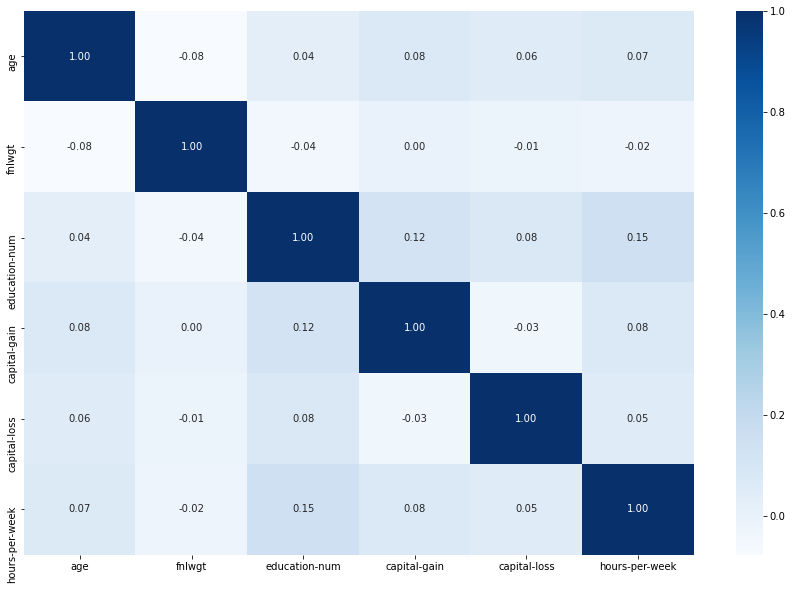

In [12]:
# making it more visual
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 fmt = '.2f',
                 cmap = 'Blues')

The correlation matrix can be done only between numerical values, which are something that we lack. <br>
We'll have to explore our data more manually.

### The role of race according to annual income

In [13]:
pd.crosstab(df.race, df['annual-income'])

annual-income,<=50K,>50K
race,,
Amer-Indian-Eskimo,275,36
Asian-Pac-Islander,763,276
Black,2737,387
Other,246,25
White,20699,7117


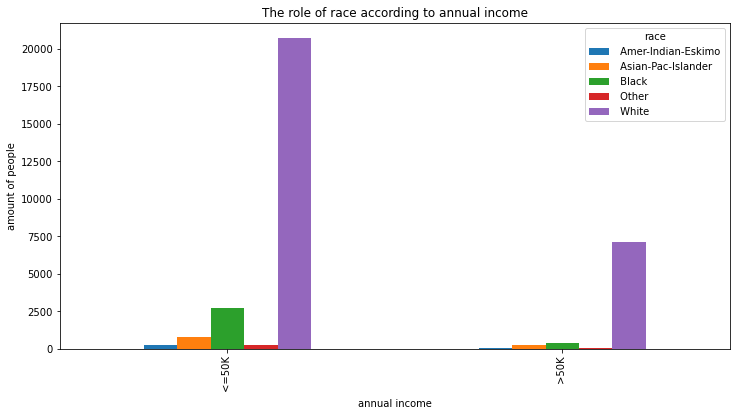

In [14]:
pd.crosstab(df.race, df['annual-income']).T.plot(kind = 'bar',
                                                 title = 'The role of race according to annual income',
                                                 figsize = (12, 6),
                                                 xlabel = 'annual income',
                                                 ylabel = 'amount of people');

This plot mat sound scary at a first glance, but we can notice that the majority of the datasets in made of whie people

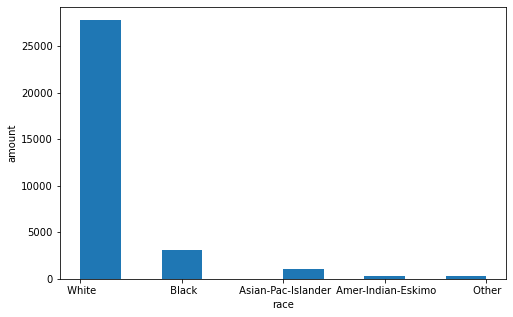

In [15]:
fig, ax = plt.subplots(figsize = (8, 5))
hist_plot = plt.hist(df.race)
hist_plot = ax.set(xlabel = 'race',
                   ylabel = 'amount')

### Relationship status according to annual income

In [19]:
pd.crosstab(df.relationship, df['annual-income']).T

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
annual-income,,,,,,
<=50K,7275,7449,944,5001,3228,823
>50K,5918,856,37,67,218,745


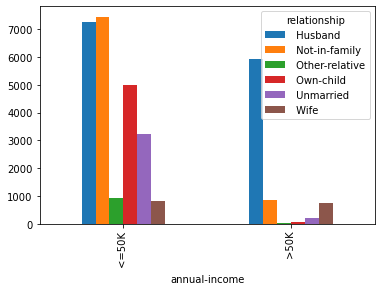

In [18]:
pd.crosstab(df.relationship, df['annual-income']).T.plot.bar();

## Modelling

In [75]:
# splitting data into train and test
np.random.seed(10)

X = df.drop('annual-income', axis = 1)
y = df['annual-income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15)

We're going to try 3 different models:

- K Nearest Neighbors
- Random Forest Classifier
- linear SVC

### Creating a baseline

We'll create a baseline for our models based on the basic `score` function that they have

In [143]:
def create_baseline(models, X_train, X_test, y_train, y_test):
    """
    fit and evalute machine learning models, returns a dict containing
    the baseline of their predictions.
    Models: dict with machine learning models in it
    X_train: train data (no labels)
    X_test: test data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # set up random seed
    np.random.seed(10)
    # make dict to store models
    baselines = {}
    # iterate the models dict
    for name, model in models.items():
        # fit the model
        print(f'Fitting {name}...')
        model.fit(X_train, y_train)
        print(f'{name} has been fitted!')
        # store and evalute the model
        print(f'Evaluating {name}...')
        baselines[name] = model.score(X_test, y_test)
        print(f'{name} has been evaluated! \nIt scored {baselines[name]*100:.2f}%')
        print('-' * 20)
    # return the dict containing the baselines
    return baselines

before using our function we have to one-hot encode some columns, <br>
to do so we can create a Pipeline

In [116]:
# creating the pipeline to one-hot encode certain features

# storing the column to encode
encoding_objects_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 
                  'race', 'sex', 'native-country']
#creating the encoder
encoding_objects_transformer = Pipeline(steps = [
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])
# creating the preprocessor
preprocessor = ColumnTransformer(transformers = [
    ('one_hot_encoding', encoding_objects_transformer, encoding_objects_features)
], remainder = 'passthrough', verbose = 0)

In [125]:
# creating the models
# K Nearest Neighbors
KNN = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', KNeighborsClassifier())
])
# Random Forest Classifier
RFC = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier())
])
# Linear SVC
SVC = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', LinearSVC())
])

In [129]:
models = {'K Nearest Neighbors': KNN,
          'Random Forest Classifier': RFC,
          'Linear SVC': SVC}

In [160]:
baselines = create_baseline(models, X_train, X_test, y_train, y_test)
baselines

Fitting K Nearest Neighbors...
K Nearest Neighbors has been fitted!
Evaluating K Nearest Neighbors...
K Nearest Neighbors has been evaluated! 
It scored 77.48%
--------------------
Fitting Random Forest Classifier...
Random Forest Classifier has been fitted!
Evaluating Random Forest Classifier...
Random Forest Classifier has been evaluated! 
It scored 84.40%
--------------------
Fitting Linear SVC...
Linear SVC has been fitted!
Evaluating Linear SVC...
Linear SVC has been evaluated! 
It scored 78.01%
--------------------


C:\Users\gabri\Desktop\data_science\heart-disease-prj\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


{'K Nearest Neighbors': 0.77482088024565,
 'Random Forest Classifier': 0.8440122824974411,
 'Linear SVC': 0.7801432958034801}

<AxesSubplot:>

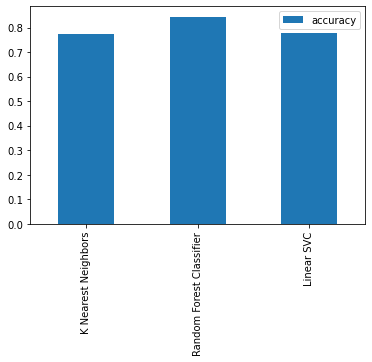

In [161]:
baseline_df = pd.DataFrame(baselines, index = ['accuracy'])
baseline_df.T.plot.bar()

## Hyperparameter tuning